In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2021-12-03 11:23:10--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6022:18::a27d:4212, 162.125.66.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6022:18::a27d:4212|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-12-03 11:23:11--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5ea2d352f0cacd8e155aa48cc9.dl.dropboxusercontent.com/cd/0/inline/BbJI-GdErltv7kyv_aIkCwqrgBiTigKjGY5APuGICwDiA6_p9AkWhF8FblYrb2otCRujqSUVwLwrtCHrbIMxqn2NuiaOiKeD0QMA0hh8EOZon8igmhtOwtlYCv5F3_tqgdwE06YhkHJuDhWqNfgA7SXY/file# [following]
--2021-12-03 11:23:11--  https://uc5ea2d352f0cacd8e155aa48cc9.dl.dropboxusercontent.com/cd/0/inline/BbJI-GdErltv7kyv_aIkCwqrgBiTigKjGY5APuGICwDiA6_p9AkWhF8FblYrb2

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.


In [9]:

import pandas as pd
import numpy as np

N=11000
file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name, nrows=N)
df=pd.DataFrame(data)
data.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
count,11000.0,11000.000000,11000.000000,1.100000e+04,11000.000000,11000.000000
mean,1.0,0.298727,55.430000,3.869200e+09,1803.829091,13.365636
std,0.0,0.457721,39.320566,3.165091e+01,1061.875496,9.217919
min,1.0,0.000000,1.000000,3.869200e+09,0.000000,0.000000
25%,1.0,0.000000,24.000000,3.869200e+09,833.000000,5.000000
50%,1.0,0.000000,56.000000,3.869200e+09,1800.500000,13.000000
75%,1.0,1.000000,64.000000,3.869200e+09,2755.250000,21.000000
max,1.0,1.000000,139.000000,3.869200e+09,3563.000000,29.000000


In [8]:
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
10995,1,0,139,3869200277,204,0
10996,1,0,61,3869200277,202,20
10997,1,0,63,3869200277,204,1
10998,1,0,59,3869200277,283,29


2\. Find out the number of BX in a ORBIT (the value 'x').

In [6]:
x=max(df.BX_COUNTER)+1
print('The x value is:',x)


The x value is: 3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [13]:
BX_unit = 25 #ns
TDC_counts=BX_unit/30
ORBIT_unit = x*BX_unit

last_idx = len(data)-1

time_ns = np.array((data['ORBIT_CNT']*(x)*BX_unit + data['BX_COUNTER']*BX_unit + data['TDC_MEAS']*TDC_counts))

estimated_time = time_ns[last_idx] - time_ns[0]
print(estimated_time)

print("estimated time (ns): ", estimated_time)
print("estimated_time (s): ", estimated_time*(10**(-9)))


9748673.3125
estimated time (ns):  9748673.3125
estimated_time (s):  0.009748673312500001


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [15]:
df['Time in ns']=time_ns
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time in ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
10995,1,0,139,3869200277,204,0,3.447457e+14
10996,1,0,61,3869200277,202,20,3.447457e+14
10997,1,0,63,3869200277,204,1,3.447457e+14
10998,1,0,59,3869200277,283,29,3.447457e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [39]:
zero_e_uno=np.random.choice((0,1),size=len(data))
print(zero_e_uno)
df['HEAD']=zero_e_uno
ndf=pd.DataFrame(df)
ndf

[1 1 0 ... 0 1 0]


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time in ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,0,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,0,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
10995,1,0,139,3869200277,204,0,3.447457e+14
10996,1,0,61,3869200277,202,20,3.447457e+14
10997,0,0,63,3869200277,204,1,3.447457e+14
10998,1,0,59,3869200277,283,29,3.447457e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

(array([528., 212., 220., 146., 169., 113., 164.,   1., 125.,  79., 116.,
         53.,  66.,  50., 100.,  43.,  24.,  50.,  21.,  33.,  18.,  39.,
         15.,  21.,  15.,  27.,  14.,  13.,  39.,  12.,  16.,   6.,  12.,
          9.,   7.,   6.,  18.,   6.,  10.,  14.,  14.,   7.,   8.,  22.,
          6.,   6.,   6.,   6.,  11.,   5.,   4.,  14.,   7.,   5.,   7.,
         16.,  11.,  11.,  13.,   7.,   3.,   3.,   6.,   3.,   2.,   1.,
          2.,   3.,   4.,   1.,   0.,   0.,   1.,   2.,   1.,   0.,   0.,
          1.,   0.,   0.,   1.,   1.,   2.,   0.,   1.,   0.,   1.,   2.,
          2.,   3.,   3.,   3.,   8.,   6.,   7.,   4.,   2.,   4.,   1.,
          0.,   8.,   1.,   7.,   5.,   8.,   4.,   8.,   5.,   3.,   0.,
          4.,   4.,   6.,   5.,   6.,   2.,   1.,  10.,  11.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 288.]),
 array([  1.        ,   2.06976744,   3.13953488,   4.20930233,
          5.27906977,   6.34883721,   7.41860465,   8.48837209,


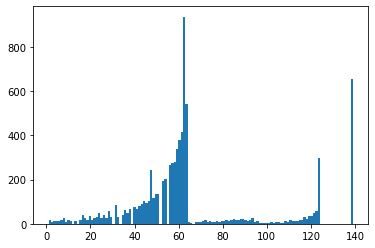

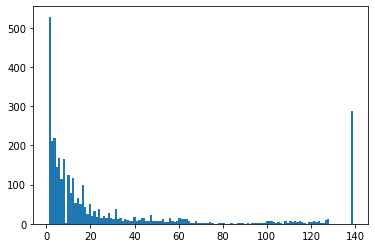

In [47]:
import matplotlib.pyplot as plt
fpga_0 = df[df['FPGA']==0]
fpga_1 = df[df['FPGA']==1]

n_channels = len(np.unique(data['TDC_CHANNEL']))


# plot for fpga = 0
plt.figure(1)
plt.hist(fpga_0['TDC_CHANNEL'], bins = n_channels)


# plot the data for fpga = 1
plt.figure(2)
plt.hist(fpga_1['TDC_CHANNEL'], bins = n_channels)

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [59]:
noisy_channels = ndf.groupby(['TDC_CHANNEL']).count()['FPGA']
noisy_channels.nlargest(3)

TDC_CHANNEL
139    941
64     554
63     548
Name: FPGA, dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [74]:
np_of_unique_topics = np.unique(df['ORBIT_CNT'])
print("the number of unique orbit is: ", len(np_of_unique_topics))

unique_139 = np.unique(df[df['TDC_CHANNEL']==139]['ORBIT_CNT'])
print("the number of unique orbits with at leat one measurement from TDC_CHANNELS=139 is: ", len(unique_139))

the number of unique orbit is:  111
the number of unique orbits with at leat one measurement from TDC_CHANNELS=139 is:  111
